## 2.2.1) Logistic Regression

In [1]:
#Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import zero_one_loss

In [2]:
#load breast cancer data

BreastData = load_breast_cancer()

#X Data
X = BreastData.data

#y Data
y = BreastData.target

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [3]:
#Applying LogisticRegression Model 

'''
#linear_model.LogisticRegression(penalty='l2’,dual=False,tol=0.0001,C=1.0,fit_intercept=True,intercept_scaling=1,
#                                class_weight=None,random_state=None,solver='warn’,max_iter=100,
#                                multi_class='warn’, verbose=0,warm_start=False, n_jobs=None)
'''

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)
LogisticRegressionModel.fit(X_train, y_train)

#Calculating Details
print('LogisticRegressionModel Train Score is : ' , LogisticRegressionModel.score(X_train, y_train))
print('LogisticRegressionModel Test Score is : ' , LogisticRegressionModel.score(X_test, y_test))
print('LogisticRegressionModel Classes are : ' , LogisticRegressionModel.classes_)
print('LogisticRegressionModel No. of iteratios is : ' , LogisticRegressionModel.n_iter_)


LogisticRegressionModel Train Score is :  0.889763779527559
LogisticRegressionModel Test Score is :  0.9414893617021277
LogisticRegressionModel Classes are :  [0 1]
LogisticRegressionModel No. of iteratios is :  [100]


c:\users\olaab\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [4]:
#Calculating Prediction
y_pred = LogisticRegressionModel.predict(X_test)
y_pred_prob = LogisticRegressionModel.predict_proba(X_test)
print('Predicted Value for LogisticRegressionModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for LogisticRegressionModel is : ' , y_pred_prob[:10])

Predicted Value for LogisticRegressionModel is :  [0 0 1 0 1 1 1 1 0 1]
Prediction Probabilities Value for LogisticRegressionModel is :  [[9.42584502e-01 5.74154975e-02]
 [9.61625154e-01 3.83748458e-02]
 [1.73159164e-01 8.26840836e-01]
 [9.99820175e-01 1.79825490e-04]
 [2.94009572e-01 7.05990428e-01]
 [3.42113923e-01 6.57886077e-01]
 [1.41784010e-01 8.58215990e-01]
 [2.45404097e-01 7.54595903e-01]
 [7.43483833e-01 2.56516167e-01]
 [1.81340441e-01 8.18659559e-01]]


Confusion Matrix is : 
 [[ 59   9]
 [  2 118]]


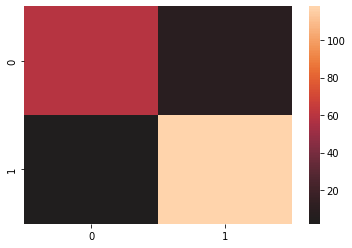

In [5]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [6]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  177


In [7]:
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.9414893617021277


In [8]:
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

Recall Score is :  0.9414893617021277


In [9]:
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.9414893617021277


In [10]:
#Calculating Precision recall Score :  
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)

PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)

Precision Recall Score is :  (0.9414893617021277, 0.9414893617021277, 0.9414893617021277, None)


In [11]:
#Calculating Precision recall Curve :  
# precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
print('Precision Value is : ', PrecisionValue)
print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

Precision Value is :  [0.63829787 0.92913386 1.        ]
Recall Value is :  [1.         0.98333333 0.        ]
Thresholds Value is :  [0 1]


In [12]:
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.97      0.87      0.91        68
           1       0.93      0.98      0.96       120

    accuracy                           0.94       188
   macro avg       0.95      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



In [13]:
#Calculating Area Under the Curve :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.9254901960784314


In [14]:
#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

fpr Value  :  [0.         0.13235294 1.        ]
tpr Value  :  [0.         0.98333333 1.        ]
thresholds Value  :  [2 1 0]


In [15]:
#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

ROCAUC Score :  0.9254901960784314


In [16]:
#Calculating Zero One Loss:  
#zero_one_loss(y_true, y_pred, normalize = True, sample_weight = None)

ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )

Zero One Loss Value :  11


### EX_2 with iris dataset

In [17]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=10, solver='lbfgs' , max_iter= 1000 , C = 0.5 , tol = 0.01)
#clf = LogisticRegression(random_state=10, solver='liblinear')
#clf = LogisticRegression(random_state=10, solver='saga')

clf.fit(X, y)
clf.predict(X[:2, :])
clf.predict_proba(X[:2, :])

score = clf.score(X, y)

print('score = ' , score)
print('No of iterations = ' , clf.n_iter_)
print('Classes = ' , clf.classes_)

score =  0.9666666666666667
No of iterations =  [85]
Classes =  [0 1 2]


### EX_3 with heart datases

In [18]:
import pandas as pd

dataset = pd.read_csv('heart.csv')

dataset.head(20)

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
clss = LogisticRegression(random_state = 0)
clss.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
# Predicting the Test set results
y_pred = clss.predict(X_test)
y_pred 

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [22]:
#probability of all values
pr = clss.predict_proba(X_test)[0:10,:]
pr

array([[0.96421264, 0.03578736],
       [0.18275371, 0.81724629],
       [0.18628997, 0.81371003],
       [0.98171588, 0.01828412],
       [0.88161474, 0.11838526],
       [0.62175492, 0.37824508],
       [0.93007085, 0.06992915],
       [0.8983798 , 0.1016202 ],
       [0.99539398, 0.00460602],
       [0.9973351 , 0.0026649 ]])

In [23]:
#probability of zeros
pr = clss.predict_proba(X_test)[0:10,0]
pr

array([0.96421264, 0.18275371, 0.18628997, 0.98171588, 0.88161474,
       0.62175492, 0.93007085, 0.8983798 , 0.99539398, 0.9973351 ])

In [24]:
#probability of ones
pr = clss.predict_proba(X_test)[0:10,1]
pr

array([0.03578736, 0.81724629, 0.81371003, 0.01828412, 0.11838526,
       0.37824508, 0.06992915, 0.1016202 , 0.00460602, 0.0026649 ])

In [25]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[24,  9],
       [ 4, 39]], dtype=int64)

In [26]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.17105263157894737

In [27]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.17105263157894737

In [28]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

0.0

### EX_3 with Standardization & Normalization

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.preprocessing import MinMaxScaler ,Normalizer
from sklearn.model_selection import train_test_split


data = load_breast_cancer()
X = data.data
y = data.target

#
#scale  = MinMaxScaler()
#scale.fit(X)
#newx = scale.transform(X)

nor = Normalizer(norm = 'max')
nor.fit(X)
newx = nor.transform(X)

x_train, x_test, y_train, y_test = train_test_split(newx, y, test_size = 0.2)


logreg = LogisticRegression()
logreg.fit(x_train , y_train)
result= logreg.predict(x_test)
print(accuracy_score(y_test , result))
 
conf = confusion_matrix(y_test , result)
print('confusion matrix \n',  conf)


0.9122807017543859
confusion matrix 
 [[31 10]
 [ 0 73]]


## 2.2.2) SGDClassifier

In [30]:
#Import Libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import zero_one_loss
from sklearn.metrics import roc_auc_score

In [31]:
#load breast cancer data

BreastData = load_breast_cancer()

#X Data
X = BreastData.data

#y Data
y = BreastData.target

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

In [32]:
#Applying SGDClassifier Model 

'''
#sklearn.linear_model.SGDClassifier(loss='hinge’, penalty=’l2’, alpha=0.0001,l1_ratio=0.15, fit_intercept=True,
#                                   max_iter=None,tol=None, shuffle=True, verbose=0, epsilon=0.1,n_jobs=None,
#                                   random_state=None, learning_rate='optimal’, eta0=0.0, power_t=0.5,
#                                   early_stopping=False, validation_fraction=0.1,n_iter_no_change=5,
#                                   class_weight=None,warm_start=False, average=False, n_iter=None)
'''

SGDClassifierModel = SGDClassifier(penalty='l2',loss='squared_loss',learning_rate='optimal',random_state=33)
SGDClassifierModel.fit(X_train, y_train)

c:\users\olaab\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:169: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  FutureWarning,


SGDClassifier(loss='squared_loss', random_state=33)

In [33]:
#Calculating Details
print('SGDClassifierModel Train Score is : ' , SGDClassifierModel.score(X_train, y_train))
print('SGDClassifierModel Test Score is : ' , SGDClassifierModel.score(X_test, y_test))
print('SGDClassifierModel loss function is : ' , SGDClassifierModel.loss_function_)
print('SGDClassifierModel No. of iteratios is : ' , SGDClassifierModel.n_iter_)

SGDClassifierModel Train Score is :  0.6220472440944882
SGDClassifierModel Test Score is :  0.6382978723404256
SGDClassifierModel loss function is :  <sklearn.linear_model._sgd_fast.SquaredLoss object at 0x000001450343BED0>
SGDClassifierModel No. of iteratios is :  77


In [34]:
#Calculating Prediction
y_pred = SGDClassifierModel.predict(X_test)
print('Predicted Value for SGDClassifierModel is : ' , y_pred[:10])

Predicted Value for SGDClassifierModel is :  [1 1 1 1 1 1 1 1 1 1]


Confusion Matrix is : 
 [[  0  68]
 [  0 120]]


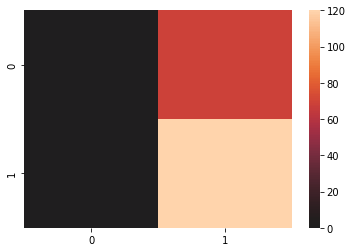

In [35]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()

In [36]:
#Calculating Accuracy Score  : ((TP + TN) / float(TP + TN + FP + FN))
AccScore = accuracy_score(y_test, y_pred, normalize=False)
print('Accuracy Score is : ', AccScore)

Accuracy Score is :  120


In [37]:
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  0.6382978723404256


In [38]:
#Calculating Precision recall Score :  
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)

PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)

Precision Recall Score is :  (0.6382978723404256, 0.6382978723404256, 0.6382978723404256, None)


In [39]:
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)

PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

Precision Score is :  0.6382978723404256


In [40]:
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

Recall Score is :  0.6382978723404256


In [41]:
#Calculating Precision recall Curve :  
# precision_recall_curve(y_true, probas_pred, pos_label=None, sample_weight=None)

PrecisionValue, RecallValue, ThresholdsValue = precision_recall_curve(y_test,y_pred)
#print('Precision Value is : ', PrecisionValue)
#print('Recall Value is : ', RecallValue)
print('Thresholds Value is : ', ThresholdsValue)

Thresholds Value is :  [1]


In [42]:
#Calculating classification Report :  
#classification_report(y_true, y_pred, labels=None, target_names=None,sample_weight=None, digits=2, output_dict=False)

ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.00      0.00      0.00        68
           1       0.64      1.00      0.78       120

    accuracy                           0.64       188
   macro avg       0.32      0.50      0.39       188
weighted avg       0.41      0.64      0.50       188



c:\users\olaab\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\olaab\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\olaab\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [43]:
#Calculating Area Under the Curve :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(y_test,y_pred)
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)

AUC Value  :  0.5


In [44]:
#Calculating Zero One Loss:  
#zero_one_loss(y_true, y_pred, normalize = True, sample_weight = None)

ZeroOneLossValue = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', ZeroOneLossValue )

Zero One Loss Value :  68


In [45]:
#Calculating ROC AUC Score:  
#roc_auc_score(y_true, y_score, average=’macro’, sample_weight=None,max_fpr=None)

ROCAUCScore = roc_auc_score(y_test,y_pred, average='micro') #it can be : macro,weighted,samples
print('ROCAUC Score : ', ROCAUCScore)

ROCAUC Score :  0.5


In [46]:
#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

fpr Value  :  [0. 1.]
tpr Value  :  [0. 1.]
thresholds Value  :  [2 1]


### EX_2

In [47]:
import numpy as np
from sklearn import linear_model
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
Y = np.array([1, 1, 2, 2])

clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)
clf.fit(X, Y)

print(clf.predict([[-0.8, -1]]))

[1]


### EX_3 

In [48]:
import pandas as pd

dataset = pd.read_csv('heart.csv')
dataset.head(20)

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5)
sgd.fit(X_train, y_train)

# Predicting the Test set results
y_pred = sgd.predict(X_test)
y_pred 

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [50]:
sgd.n_iter_

26

In [51]:
#probability of all values
pr = sgd.predict_proba(X_test)[0:10,:]
pr

array([[9.91003807e-01, 8.99619294e-03],
       [1.55897540e-04, 9.99844102e-01],
       [5.17695428e-04, 9.99482305e-01],
       [1.00000000e+00, 3.08421194e-10],
       [9.99999996e-01, 4.29746838e-09],
       [9.99984466e-01, 1.55343681e-05],
       [9.99998267e-01, 1.73339804e-06],
       [9.99999975e-01, 2.45571530e-08],
       [9.99980412e-01, 1.95884411e-05],
       [1.00000000e+00, 2.24630676e-14]])

In [52]:
#  Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[26,  7],
       [13, 30]], dtype=int64)

In [53]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.2631578947368421

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.2631578947368421

In [55]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)

0.0

In [56]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='micro')

0.7368421052631579

### EX_4 

In [57]:
from sklearn import datasets
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target


xtrain , xtest , ytrain , ytest = train_test_split(X_digits , y_digits ,  test_size = 0.2, )

sgd = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5, random_state=0)

sgd.fit(xtrain, ytrain)


sgd.score(xtrain, ytrain)

y_pred = sgd.predict(xtest)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, y_pred)

0.19166666666666668